In [1]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../medical_abstracts_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201653 entries, 0 to 201652
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Abstract  201653 non-null  object
 1   DOI       201653 non-null  object
 2   Date      201653 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


In [3]:
# Use huggingface-cli login command to authenticate before running this cell
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B")

In [4]:
token_lengths = []
text_char_lengths = []
text_word_lengths = []
for text in df["Abstract"]:
    tokens = tokenizer.encode(text, add_special_tokens=True)
    token_lengths.append(len(tokens))
    text_char_lengths.append(len(text))
    text_word_lengths.append(len(text.split()))

In [5]:
sum(token_lengths)

70445262

In [21]:
token_min = min(token_lengths)
token_max = max(token_lengths)
token_mean = sum(token_lengths) / len(token_lengths)
token_std = (sum((x - token_mean) ** 2 for x in token_lengths) / len(token_lengths)) ** 0.5
print(f"Mean token length: {token_mean}")
print(f"Standard deviation of token length: {token_std}")
print(f"Minimum token length: {token_min}")
print(f"Maximum token length: {token_max}")

Mean token length: 349.3390229751107
Standard deviation of token length: 152.25590608518425
Minimum token length: 2
Maximum token length: 16561


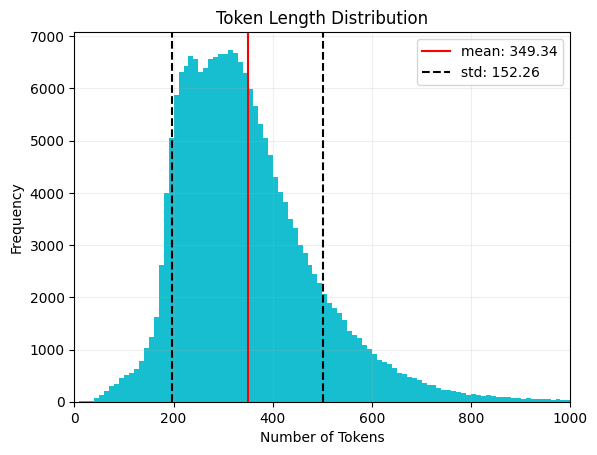

In [59]:
plt.hist(token_lengths, bins=range(0, max(token_lengths) + 10, 10), color="C9")
plt.axvline(token_mean, color='r', label=f"mean: {token_mean:.2f}")
plt.axvline(token_mean - token_std, c='k', ls="--", label=f"std: {token_std:.2f}")
plt.axvline(token_mean + token_std, c='k', ls="--")
plt.title('Token Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(alpha=0.2)
plt.xlim(0, 1000)
plt.show()

In [23]:
text_char_min = min(text_char_lengths)
text_char_max = max(text_char_lengths)
text_char_mean = sum(text_char_lengths) / len(text_char_lengths)
text_char_std = (sum((x - text_char_mean) ** 2 for x in text_char_lengths) / len(text_char_lengths)) ** 0.5
print(f"Mean char length: {text_char_mean}")
print(f"Standard deviation of char length: {text_char_std}")
print(f"Minimum char length: {text_char_min}")
print(f"Maximum char length: {text_char_max}")

Mean char length: 1711.5949477567901
Standard deviation of char length: 687.4415756905917
Minimum char length: 4
Maximum char length: 65457


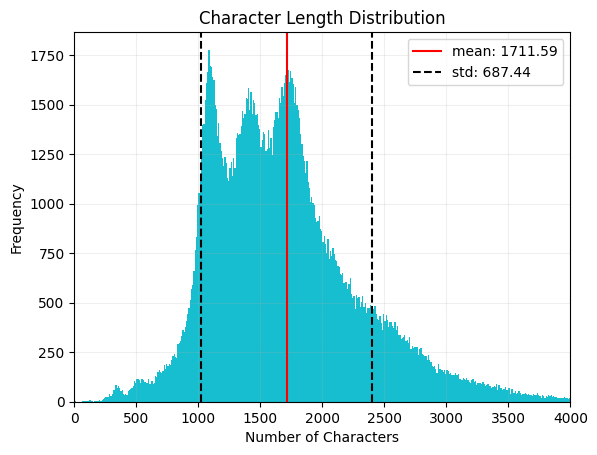

In [54]:
plt.hist(text_char_lengths, bins=range(0, max(text_char_lengths) + 10, 10), color="C9")
plt.axvline(text_char_mean, color='r', label=f"mean: {text_char_mean:.2f}")
plt.axvline(text_char_mean - text_char_std, c='k', ls="--", label=f"std: {text_char_std:.2f}")
plt.axvline(text_char_mean + text_char_std, c='k', ls="--")
plt.title('Character Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(alpha=0.2)
plt.xlim(0, 4000)
plt.show()

In [25]:
text_word_min = min(text_word_lengths)
text_word_max = max(text_word_lengths)
text_word_mean = sum(text_word_lengths) / len(text_word_lengths)
text_word_std = (sum((x - text_word_mean) ** 2 for x in text_word_lengths) / len(text_word_lengths)) ** 0.5
print(f"Mean word length: {text_word_mean}")
print(f"Standard deviation of word length: {text_word_std}")
print(f"Minimum word length: {text_word_min}")
print(f"Maximum word length: {text_word_max}")

Mean word length: 239.9031107893262
Standard deviation of word length: 97.22465035244502
Minimum word length: 1
Maximum word length: 9436


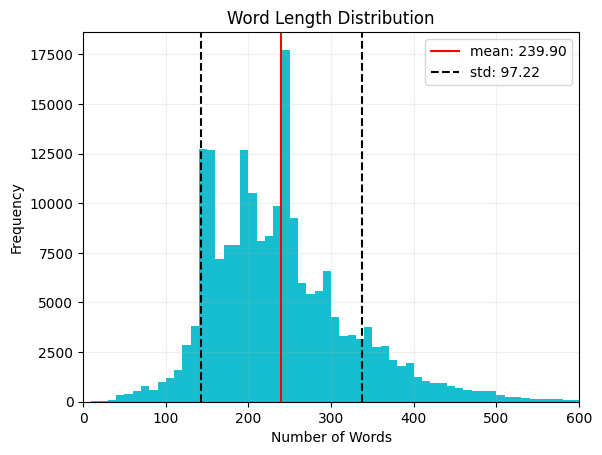

In [50]:
plt.hist(text_word_lengths, bins=range(0, max(text_word_lengths) + 10, 10), color="C9")
plt.axvline(text_word_mean, color='r', label=f"mean: {text_word_mean:.2f}")
plt.axvline(text_word_mean - text_word_std, c='k', ls="--", label=f"std: {text_word_std:.2f}")
plt.axvline(text_word_mean + text_word_std, c='k', ls="--")
plt.title('Word Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(alpha=0.2)
plt.xlim(0, 600)
plt.show()